In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("my_dataframe.csv")

In [18]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [20]:
df.head()

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,game_ages,Units_sold,Platform3DS,PlatformDC,PlatformDS,...,Publisher_groupedZushi Games,TypeHandheld,TypeHome,FirmMicrosoft,FirmNEC/Hudson Soft,FirmNintendo,FirmOther Firm,FirmSega,FirmSony,log_Global_Sales
0,82.53,76.0,51,8.0,322,17,101.63,0,0,0,...,0,0.0,1.0,0,0,1,0,0,0,4.425206
1,35.52,82.0,73,8.3,709,15,101.63,0,0,0,...,0,0.0,1.0,0,0,1,0,0,0,3.597860
2,32.77,80.0,73,8.0,192,14,101.63,0,0,0,...,0,0.0,1.0,0,0,1,0,0,0,3.519573
3,29.80,89.0,65,8.5,431,17,154.02,0,0,1,...,0,1.0,0.0,0,0,1,0,0,0,3.427515
4,28.92,58.0,41,6.6,129,17,101.63,0,0,0,...,0,0.0,1.0,0,0,1,0,0,0,3.398527


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import shap



# Split the data into training and testing sets
X = df.drop(['log_Global_Sales', 'Global_Sales'], axis=1)
y = df['log_Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [22]:
model = XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

# Get the SHAP values for the test data
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

# Plot the SHAP values for each feature

Permutation explainer: 1955it [00:56, 28.04it/s]                          


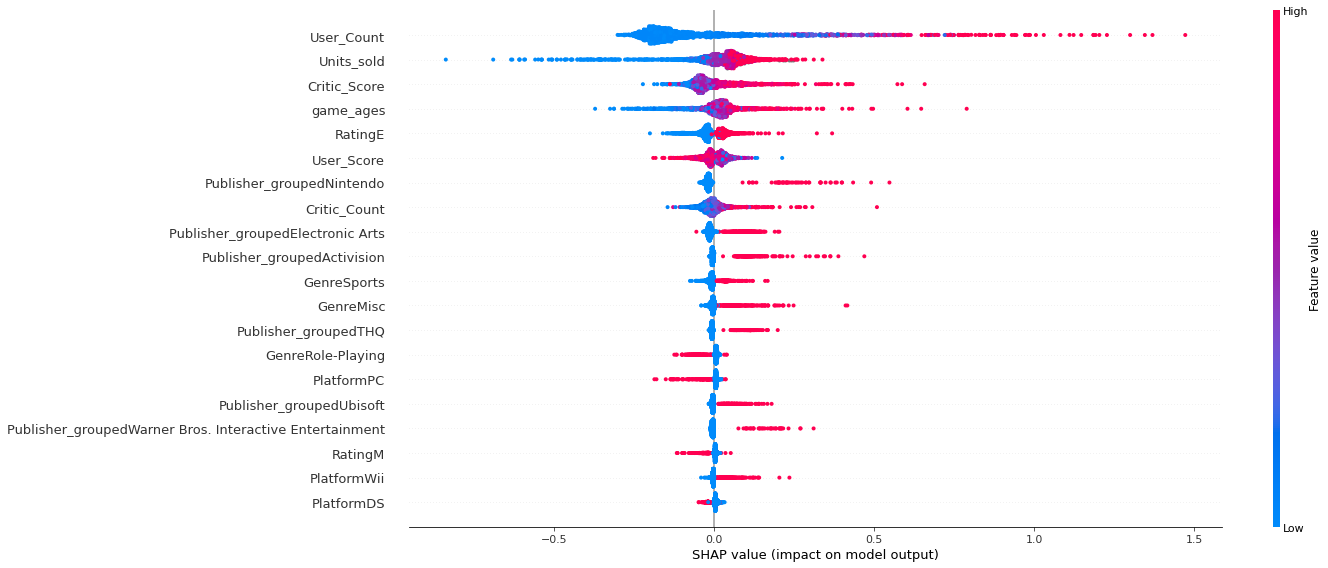

In [23]:
shap.summary_plot(shap_values, X_test, plot_size=(20, 8))